In [31]:

from urllib.request import urlopen 

webpage = urlopen('https://www.rottentomatoes.com')

for line in webpage:
    print(line.rstrip().decode('utf-8'))

<!DOCTYPE html>
<html lang="en"
      dit="ltr"
      xmlns:fb="http://www.facebook.com/2008/fbml"
      xmlns:og="http://opengraphprotocol.org/schema/">

    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">

        <!-- salt=lay-def-02-juRm -->
        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
        <meta http-equiv="x-ua-compatible" content="ie=edge">
        <meta name="viewport" content="width=device-width, initial-scale=1">

        <title>Rotten Tomatoes: Movies | TV Shows | Movie Trailers | Reviews - Rotten Tomatoes</title>
        <meta name="description" content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies & TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets">


            <link rel="canonical" href="https://www.rottentomatoes.com/">






        <link rel="shortcut icon" sizes="76x76" type="image/x-icon" href="https://www.rotte

In [32]:
# tv shows
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

r = requests.get('https://www.rottentomatoes.com')
c=r.text
soup = BeautifulSoup(c, 'html.parser')

x=soup.find_all("tr",class_="tv_show_tr tvTopListTitle")
for item in x:
    print(item)
    print('--------------------------------------------------')

<tr class="tv_show_tr tvTopListTitle">
<td class="left_col">
<a href="/tv/the_bold_type/s03">
<span class="icon tiny fresh"></span>
<span class="tMeterScore">100%</span>
</a>
</td>
<td class="middle_col">
<a href="/tv/the_bold_type/s03">
            
                The Bold Type
            
        </a>
</td>
</tr>
--------------------------------------------------
<tr class="tv_show_tr tvTopListTitle">
<td class="left_col">
<a href="/tv/fosse_verdon/s01">
<span class="icon tiny certified_fresh"></span>
<span class="tMeterScore">83%</span>
</a>
</td>
<td class="middle_col">
<a href="/tv/fosse_verdon/s01">
            
                Fosse/Verdon
            
        </a>
</td>
</tr>
--------------------------------------------------
<tr class="tv_show_tr tvTopListTitle">
<td class="left_col">
<a href="/tv/the_kids_are_alright/s01">
<span class="icon tiny fresh"></span>
<span class="tMeterScore">82%</span>
</a>
</td>
<td class="middle_col">
<a href="/tv/the_kids_are_alright/s01">
   

In [33]:

tv_list={}
for element in x:
    tv_show=(element.find(class_="left_col").get_text()).strip('\n')
    tv_list[(element.find(class_="middle_col").get_text()).strip()]=tv_show   
print(tv_list) 

{'The Bold Type': '100%', 'Fosse/Verdon': '83%', 'The Kids Are Alright': '82%', 'Bless This Mess': '82%', 'black-ish': '80%', 'The Village': '31%', 'The Last O.G.': 'No Score Yet', 'NCIS': 'No Score Yet', 'American Housewife': 'No Score Yet', 'Tosh.0': 'No Score Yet', 'The Jim Jefferies Show': 'No Score Yet', 'Deadliest Catch': 'No Score Yet', 'Game of Thrones': '67%', 'Chernobyl': '95%', 'Lucifer': '100%', 'Barry': '100%', 'Dead to Me': '86%', 'A Discovery of Witches': '100%', 'The Society': '76%', 'Fleabag': '100%', 'Catch-22': '84%', 'Les Misérables': '96%', 'Killing Eve': '97%', 'Breaking Bad': '100%'}


In [34]:
#split dictionary into two lists, one for the key and the other for the value 
tv_keys=[]
for item in tv_list:
    tv_keys=tv_list.keys()
print(tv_keys)

dict_keys(['The Bold Type', 'Fosse/Verdon', 'The Kids Are Alright', 'Bless This Mess', 'black-ish', 'The Village', 'The Last O.G.', 'NCIS', 'American Housewife', 'Tosh.0', 'The Jim Jefferies Show', 'Deadliest Catch', 'Game of Thrones', 'Chernobyl', 'Lucifer', 'Barry', 'Dead to Me', 'A Discovery of Witches', 'The Society', 'Fleabag', 'Catch-22', 'Les Misérables', 'Killing Eve', 'Breaking Bad'])


In [35]:
#print values
tv_values=[]
for item in tv_list:
    tv_values=tv_list.values()
print(tv_values)

dict_values(['100%', '83%', '82%', '82%', '80%', '31%', 'No Score Yet', 'No Score Yet', 'No Score Yet', 'No Score Yet', 'No Score Yet', 'No Score Yet', '67%', '95%', '100%', '100%', '86%', '100%', '76%', '100%', '84%', '96%', '97%', '100%'])


In [36]:
#writing data into a textfile for tv-shows
fob=open(r'data/tv_shows.txt','w')
fob.write('TV Shows : Rating')
fob.write('\n')
fob.write('---------------------')
fob.write('\n')
for item in tv_list:
    fob.write(item)
    fob.write(' : ')
    fob.write(tv_list[item])
    fob.write('\n')
fob.close()

In [37]:
#reading tv shows text file
fob=open(r'data/tv_shows.txt')  
fcon=fob.read()   
print(fcon) 
fob.close()

TV Shows : Rating
---------------------
The Bold Type : 100%
Fosse/Verdon : 83%
The Kids Are Alright : 82%
Bless This Mess : 82%
black-ish : 80%
The Village : 31%
The Last O.G. : No Score Yet
NCIS : No Score Yet
American Housewife : No Score Yet
Tosh.0 : No Score Yet
The Jim Jefferies Show : No Score Yet
Deadliest Catch : No Score Yet
Game of Thrones : 67%
Chernobyl : 95%
Lucifer : 100%
Barry : 100%
Dead to Me : 86%
A Discovery of Witches : 100%
The Society : 76%
Fleabag : 100%
Catch-22 : 84%
Les Misérables : 96%
Killing Eve : 97%
Breaking Bad : 100%



In [38]:
#movies
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

r = requests.get('https://www.rottentomatoes.com/')
c=r.text
soup = BeautifulSoup(c, 'html.parser')

y=soup.find_all("tr", class_="")
for item in y:
    print(item)
    print('--------------------------------------------------')

<tr class="">
<td class="left_col">
<a href="/m/aladdin">
<span class="tMeterIcon tiny noRating">No Score Yet</span>
</a>
</td>
<td class="middle_col">
<a href="/m/aladdin">Aladdin</a>
</td>
<td class="right_col right">
<a href="/m/aladdin">
                
                    May 24
                
            </a>
</td>
</tr>
--------------------------------------------------
<tr class="">
<td class="left_col">
<a href="/m/brightburn">
<span class="icon tiny fresh"></span>
<span class="tMeterScore">78%</span>
</a>
</td>
<td class="middle_col">
<a href="/m/brightburn">Brightburn</a>
</td>
<td class="right_col right">
<a href="/m/brightburn">
                
                    May 24
                
            </a>
</td>
</tr>
--------------------------------------------------
<tr class="">
<td class="left_col">
<a href="/m/booksmart">
<span class="icon tiny fresh"></span>
<span class="tMeterScore">100%</span>
</a>
</td>
<td class="middle_col">
<a href="/m/booksmart">Booksmart</a

In [39]:
movie_list={}
for element in y:
    movie=(element.find(class_="left_col").get_text()).strip('\n')
    movie_list[(element.find(class_="middle_col").get_text()).strip()]=movie  
print(movie_list) 

{'Aladdin': 'No Score Yet', 'Brightburn': '78%', 'Booksmart': '100%', 'Funny Story': '100%', 'Diamantino': '86%', 'John Wick: Chapter 3 - Parabellum': '88%', 'Avengers: Endgame': '94%', 'Pokémon Detective Pikachu': '65%', "A Dog's Journey": '47%', 'The Hustle': '16%', 'The Intruder': '30%', 'Long Shot': '81%', 'The Sun Is Also a Star': '52%', 'Poms': '32%', 'UglyDolls': '30%', 'Godzilla: King of the Monsters': 'No Score Yet', 'Rocketman': '89%', 'Ma': 'No Score Yet', 'The Garden': 'No Score Yet', 'Too Late to Die Young (Tarde para morir joven)': '100%', 'How to Train Your Dragon: The Hidden World': '91%', 'The Upside': '40%', "Isn't It Romantic": '69%', 'Ladies in Black': '85%'}


In [40]:
movie_keys=[]
for item in movie_list:
    movie_keys=movie_list.keys()
print(movie_keys)

dict_keys(['Aladdin', 'Brightburn', 'Booksmart', 'Funny Story', 'Diamantino', 'John Wick: Chapter 3 - Parabellum', 'Avengers: Endgame', 'Pokémon Detective Pikachu', "A Dog's Journey", 'The Hustle', 'The Intruder', 'Long Shot', 'The Sun Is Also a Star', 'Poms', 'UglyDolls', 'Godzilla: King of the Monsters', 'Rocketman', 'Ma', 'The Garden', 'Too Late to Die Young (Tarde para morir joven)', 'How to Train Your Dragon: The Hidden World', 'The Upside', "Isn't It Romantic", 'Ladies in Black'])


In [41]:
movie_values=[]
for item in movie_list:
    movie_values=movie_list.values()
print(movie_values)

dict_values(['No Score Yet', '78%', '100%', '100%', '86%', '88%', '94%', '65%', '47%', '16%', '30%', '81%', '52%', '32%', '30%', 'No Score Yet', '89%', 'No Score Yet', 'No Score Yet', '100%', '91%', '40%', '69%', '85%'])


In [42]:
fob=open(r'data\movie_list.txt','w')
fob.write('Movies : Rating')
fob.write('\n')
fob.write('----------------')
fob.write('\n')
for item in movie_list:
    fob.write(item)
    fob.write(' : ')
    fob.write(movie_list[item])
    fob.write('\n')
fob.close()

In [43]:
fob=open(r'data\movie_list.txt')  
fcon=fob.read()   
print (fcon) 
fob.close()

Movies : Rating
----------------
Aladdin : No Score Yet
Brightburn : 78%
Booksmart : 100%
Funny Story : 100%
Diamantino : 86%
John Wick: Chapter 3 - Parabellum : 88%
Avengers: Endgame : 94%
Pokémon Detective Pikachu : 65%
A Dog's Journey : 47%
The Hustle : 16%
The Intruder : 30%
Long Shot : 81%
The Sun Is Also a Star : 52%
Poms : 32%
UglyDolls : 30%
Godzilla: King of the Monsters : No Score Yet
Rocketman : 89%
Ma : No Score Yet
The Garden : No Score Yet
Too Late to Die Young (Tarde para morir joven) : 100%
How to Train Your Dragon: The Hidden World : 91%
The Upside : 40%
Isn't It Romantic : 69%
Ladies in Black : 85%



In [77]:
#Data Analysis
import pandas
import matplotlib.pyplot as plt

In [79]:
#Creating csv file for tv shows
import os, csv

with open("tv_shows.csv", "w") as toWrite:
    writer = csv.writer(toWrite, delimiter=",")
    writer.writerow(["name", "rating"])
    for a in tv_list.keys():
        writer.writerow([a, tv_list[a]])
        

In [80]:
tv_data=pandas.read_csv(r'data/tv_shows.csv',low_memory=False)
display(tv_data)

,name,rating
0,The Bold Type,100%
1,Fosse/Verdon,83%
2,The Kids Are Alright,82%
3,Bless This Mess,82%
4,black-ish,80%
5,The Village,31%
6,The Last O.G.,No Score Yet
7,NCIS,No Score Yet
8,American Housewife,No Score Yet
9,Tosh.0,No Score Yet


In [81]:
tv_data.head()

,name,rating
0,The Bold Type,100%
1,Fosse/Verdon,83%
2,The Kids Are Alright,82%
3,Bless This Mess,82%
4,black-ish,80%


In [84]:
tv_rating_count=tv_data['rating'].value_counts()
print(tv_rating_count)

100%            6
No Score Yet    6
82%             2
80%             1
84%             1
67%             1
97%             1
95%             1
96%             1
31%             1
86%             1
76%             1
83%             1
Name: rating, dtype: int64


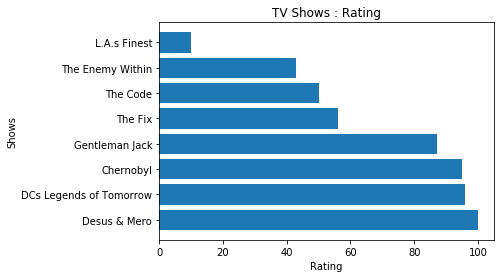

In [88]:
import matplotlib.pyplot as plt

x = ('Desus & Mero', 'DCs Legends of Tomorrow', 'Chernobyl', 'Gentleman Jack', 'The Fix', 'The Code','The Enemy Within','L.A.s Finest')
y = [100,96,95,87,56,50,43,10]

#horizontal bar
plt.barh(x, y)
plt.xlabel('Rating')
plt.ylabel('Shows')
plt.title('TV Shows : Rating')

plt.show()

In [66]:
import os, csv

with open("movies.csv", "w") as toWrite:
    writer = csv.writer(toWrite, delimiter=",")
    writer.writerow(["name", "rating"])
    for a in movie_list.keys():
        writer.writerow([a, movie_list[a]])


In [85]:
#reading csv file and displaying a
movie_data=pandas.read_csv(r'data/movies.csv',low_memory=False)
display(movie_data)

,name,rating
0,Aladdin,No Score Yet
1,Brightburn,78%
2,Booksmart,100%
3,Funny Story,100%
4,Diamantino,86%
5,John Wick: Chapter 3 - Parabellum,88%
6,Avengers: Endgame,94%
7,Pokémon Detective Pikachu,65%
8,A Dog's Journey,47%
9,The Hustle,16%


In [86]:
movie_data.head()

,name,rating
0,Aladdin,No Score Yet
1,Brightburn,78%
2,Booksmart,100%
3,Funny Story,100%
4,Diamantino,86%


In [87]:
#series for counting how many times the rating appears
movie_rating_count=movie_data['rating'].value_counts()
print(movie_rating_count)

No Score Yet    4
100%            3
30%             2
69%             1
16%             1
85%             1
94%             1
40%             1
52%             1
91%             1
86%             1
81%             1
47%             1
65%             1
78%             1
89%             1
88%             1
32%             1
Name: rating, dtype: int64


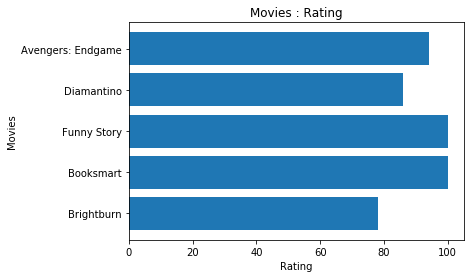

In [91]:
import matplotlib.pyplot as plt

x = ('Brightburn', 'Booksmart', 'Funny Story', 'Diamantino', 'Avengers: Endgame')
y = [78,100,100,86,94]

#horizontal bar
plt.barh(x, y)
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.title('Movies : Rating')

plt.show()